In [5]:
from classifer.classifer_base import Classifier
from sklearn.preprocessing import StandardScaler

data = Classifier.read_data("./data/1BAN.csv")
train, val = Classifier.random_split_scikit(data, ratio=0.65, seed=10)

scaler = StandardScaler()
train.x = scaler.fit_transform(train.x)
val.x = scaler.transform(val.x)


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import numpy as np
from matplotlib import pyplot as plt

SVR_C = 1.0 # math.pow(10, N) N : -4 ~ 3
SVR_KERNEL = ["linear", "poly", "rbf", "sigmoid"]
SVR_EPSION = np.mean(data.gt) * 0.15 # 85% 的准确率
print(SVR_EPSION)
SVR_GAMMA = "auto"

for kernel in SVR_KERNEL:
    model = SVR(kernel=kernel,
                gamma=SVR_GAMMA,
                epsilon=SVR_EPSION,
                C=SVR_C)

    model.fit(train.x, train.gt)
    val_pred = model.predict(val.x)

    perc_within_eps = 100.0 * np.sum((val.gt - val_pred) < SVR_EPSION) / len(val.gt)
    print(f"percentage within epsilon ({SVR_EPSION}), kernel ({kernel}): {perc_within_eps:.2f}")

0.2718005081632653
percentage within epsilon (0.2718005081632653), kernel (linear): 72.22
percentage within epsilon (0.2718005081632653), kernel (poly): 66.67
percentage within epsilon (0.2718005081632653), kernel (rbf): 72.22
percentage within epsilon (0.2718005081632653), kernel (sigmoid): 72.22


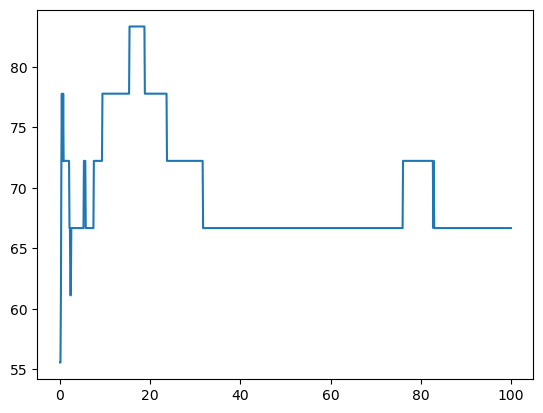

In [9]:
SVR_KERNEL = "rbf"

SVR_C = np.linspace(0.0001, 100, 1000) # math.pow(10, N) N : -4 ~ 3

perc_list = []
for C in SVR_C:
    model = SVR(kernel=SVR_KERNEL,
                gamma=SVR_GAMMA,
                epsilon=SVR_EPSION,
                C=C)

    model.fit(train.x, train.gt)
    val_pred = model.predict(val.x)

    perc_within_eps = 100.0 * np.sum((val.gt - val_pred) < SVR_EPSION) / len(val.gt)
    perc_list.append(perc_within_eps)

plt.plot(SVR_C, perc_list)
plt.show()